## Visualizing data on World Development Indicators from the Democracy Index

## Background

The Economist Intelligence Unit collects and publishes an annual ranking called the "[Democracy Index](https://en.wikipedia.org/wiki/Democracy_Index)" ([2021](https://www.eiu.com/n/campaigns/democracy-index-2021/)). I have collected and standardized this annual data from 2010 onwards.

## Load libraries; inspect and clean datasets 

Import the `numpy`, `pandas`, matplotlib's `pyplot`, and `seaborn` libraries and the matplotlib cell magic. (2 pt)

In [2]:
# Using the World Development Indicators, Democracy Index, or a similar country-level longitudinal dataset 
# to make a persuasive argument about how countries, regions, and/or the world are changing

In [3]:
import numpy as np
np.set_printoptions(suppress=True)

import pandas as pd
idx = pd.IndexSlice
pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sb

Load "democracy_index.csv", store as `democracy_df`, and inspect. (2 pts)

In [4]:
democracy_df = pd.read_csv('democracy_index.csv')
democracy_df

Country  Year  Rank  Overall score  Electoral process and pluralism  \
0     Afghanistan  2021   167           0.32                             0.00   
1     Afghanistan  2020   139           2.85                             3.42   
2     Afghanistan  2019  141=           2.85                             3.42   
3     Afghanistan  2018   143           2.97                             2.92   
4     Afghanistan  2017   149           2.55                             2.50   
...           ...   ...   ...            ...                              ...   
1999     Zimbabwe  2014   150           2.78                             0.50   
2000     Zimbabwe  2013   150           2.67                             0.50   
2001     Zimbabwe  2012   148           2.67                             0.50   
2002     Zimbabwe  2011   147           2.68                             0.00   
2003     Zimbabwe  2010   146           2.64                             0.00   

      Functioning of government  Political participation  Political culture  \
0                          0.07                     0.00               1.25   
1                          0.64                     3.89               2.50   
2                          0.64                     3.89               2.50   
3                          1.14                     4.44               2.50   
4                          1.14                     2.78               2.50   
...                         ...                      ...                ...   
1999                       1.29                     3.89               5.00   
2000                       1.29                     3.33               5.00   
2001                       1.29                     3.33               5.00   
2002                       1.29                     3.89               5.00   
2003                       1.29                     3.33               5.63   

      Civil liberties  
0                0.29  
1                3.82  
2                3.82  
3                3.82  
4                3.82  
...               ...  
1999             3.24  
2000             3.24  
2001             3.24  
2002             3.24  
2003             2.94  

[2004 rows x 9 columns]

Load "regional_classifications", store as `regions_df`, and inspect. (2 pts)

In [5]:
regions_df = pd.read_csv('regional_classifications.csv')
regions_df

Country Name Iso3 code UN Regions    UN sub-region  \
0           Afghanistan       AFG       Asia    Southern Asia   
1               Albania       ALB     Europe  Southern Europe   
2               Algeria       DZA     Africa  Northern Africa   
3        American Samoa       ASM    Oceania        Polynesia   
4               Andorra       AND     Europe  Southern Europe   
..                  ...       ...        ...              ...   
217   Wallis and Futuna       WLF    Oceania        Polynesia   
218  West Bank and Gaza       PSE       Asia     Western Asia   
219               Yemen       YEM       Asia     Western Asia   
220              Zambia       ZMB     Africa   Eastern Africa   
221            Zimbabwe       ZWE     Africa   Eastern Africa   

                  UNICEF region      WHO Region World Bank Income Group  \
0                    South Asia            EMRO              Low income   
1         Europe & Central Asia            EURO           Middle Income   
2    Middle East & North Africa            AFRO           Middle Income   
3                Not Classified  Not Classified           Middle Income   
4         Europe & Central Asia            EURO             High Income   
..                          ...             ...                     ...   
217              Not Classified  Not Classified          Not Classified   
218  Middle East & North Africa  Not Classified           Middle Income   
219  Middle East & North Africa            EMRO           Middle Income   
220                       ESARO            AFRO           Middle Income   
221                       ESARO            AFRO              Low income   

    World Bank Income Group Combined          World Bank Regions  \
0              Low and Middle Income                  South Asia   
1              Low and Middle Income       Europe & Central Asia   
2              Low and Middle Income  Middle East & North Africa   
3              Low and Middle Income         East Asia & Pacific   
4                        High Income       Europe & Central Asia   
..                               ...                         ...   
217                   Not Classified              Not Classified   
218            Low and Middle Income  Middle East & North Africa   
219            Low and Middle Income  Middle East & North Africa   
220            Low and Middle Income          Sub-Saharan Africa   
221            Low and Middle Income          Sub-Saharan Africa   

             MDG Region                                   SDG Region  \
0         Southern Asia               Central Asia and Southern Asia   
1     Developed regions                  Northern America and Europe   
2       Northern Africa             Western Asia and Northern Africa   
3               Oceania  Oceania excluding Australia and New Zealand   
4     Developed regions                  Northern America and Europe   
..                  ...                                          ...   
217      Not Classified  Oceania excluding Australia and New Zealand   
218        Western Asia             Western Asia and Northern Africa   
219        Western Asia             Western Asia and Northern Africa   
220  Sub-Saharan Africa                           Sub-Saharan Africa   
221  Sub-Saharan Africa                           Sub-Saharan Africa   

                                 LDCs Developed/Developing  
0    Least Developed Countries (LDCs)   Developing regions  
1                                 NaN    Developed regions  
2                                 NaN   Developing regions  
3                                 NaN   Developing regions  
4                                 NaN    Developed regions  
..                                ...                  ...  
217                               NaN   Developing regions  
218                               NaN   Developing regions  
219  Least Developed Countries (LDCs)   Developing regions  
220  Least Developed Countries (LDCs)

Identify the unique countries present in `democracy_df` but not in `regions_df` as `dem_minus_reg`. Print the size of `dem_minus_reg`. (1 pt)

In [6]:
dem_minus_reg = []
for c in democracy_df['Country'].unique():
    if c not in regions_df['Country Name'].unique():
        dem_minus_reg.append(c)     
len(dem_minus_reg)

0

Identify the unique countries present in `regions_df` but not in `democracy_df` as `reg_minus_dem`. Print the size of `reg_minus_dem`. (1 pt)

In [7]:
reg_minus_dem = []
for cn in regions_df['Country Name'].unique():
    if cn not in democracy_df['Country'].unique():
        reg_minus_dem.append(cn) 
len(reg_minus_dem)

55

In [8]:
len(democracy_df['Country'].unique())

167

In [9]:
len(regions_df['Country Name'].unique())

222

Based on the differences in the countries present, is additional data cleaning required? What is an appropriate join strategy? How many countries should be in the joined data? (2 pts)

## Performing joisn and exploratory analyses

Join `regions_df` on `democracy_df` using the join strategy you outlined above and store it as `joined_df`. Print the shape of `joined_df` and inspect the first 15 rows. (5 points)

In [10]:
joined_df = pd.merge( left = democracy_df, right = regions_df, left_on = 'Country', right_on = 'Country Name',
    how = 'inner')
len(joined_df["Country"].unique())

167

In [11]:
print(joined_df.shape)
joined_df.head(15)

(2004, 22)


Country  Year  Rank  Overall score  Electoral process and pluralism  \
0   Afghanistan  2021   167           0.32                             0.00   
1   Afghanistan  2020   139           2.85                             3.42   
2   Afghanistan  2019  141=           2.85                             3.42   
3   Afghanistan  2018   143           2.97                             2.92   
4   Afghanistan  2017   149           2.55                             2.50   
5   Afghanistan  2016   149           2.55                             2.50   
6   Afghanistan  2015   147           2.77                             2.50   
7   Afghanistan  2014   151           2.77                             2.50   
8   Afghanistan  2013   154           2.48                             2.50   
9   Afghanistan  2012   152           2.48                             2.50   
10  Afghanistan  2011   152           2.48                             2.50   
11  Afghanistan  2010   150           2.48                             2.50   
12      Albania  2021    68           6.11                             7.00   
13      Albania  2020    71           6.08                             7.00   
14      Albania  2019    79           5.89                             7.00   

    Functioning of government  Political participation  Political culture  \
0                        0.07                     0.00               1.25   
1                        0.64                     3.89               2.50   
2                        0.64                     3.89               2.50   
3                        1.14                     4.44               2.50   
4                        1.14                     2.78               2.50   
5                        1.14                     2.78               2.50   
6                        1.14                     3.89               2.50   
7                        1.14                     3.89               2.50   
8                        0.79                     2.78               2.50   
9                        0.79                     2.78               2.50   
10                       0.79                     2.78               2.50   
11                       0.79                     2.78               2.50   
12                       6.43                     4.44               5.63   
13                       5.36                     4.44               6.25   
14                       5.36                     4.44               5.00   

    Civil liberties Country Name Iso3 code UN Regions    UN sub-region  \
0              0.29  Afghanistan       AFG       Asia    Southern Asia   
1              3.82  Afghanistan       AFG       Asia    Southern Asia   
2              3.82  Afghanistan       AFG       Asia    Southern Asia   
3              3.82  Afghanistan       AFG       Asia    Southern Asia   
4              3.82  Afghanistan       AFG       Asia    Southern Asia   
5              3.82  Afghanistan       AFG       Asia    Southern Asia   
6              3.82  Afghanistan       AFG       Asia    Southern Asia   
7              3.82  Afghanistan       AFG       Asia    Southern Asia   
8              3.82  Afghanistan       AFG       Asia    Southern Asia   
9              3.82  Afghanistan       AFG       Asia    Southern Asia   
10             3.82  Afghanistan       AFG       Asia    Southern Asia   
11             3.82  Afghanistan       AFG       Asia    Southern Asia   
12             7.06      Albania       ALB     Europe  Southern Europe   
13             7.35      Albania       ALB     Europe  Southern Europe   
14             7.65      Albania       ALB     Europe  Southern Europe   

            UNICEF region WHO Region World Bank Income Group  \
0              South Asia       EMRO              Low income   
1              South Asia       EMRO              Low income   
2              South Asia       EMRO              Low income   
3              South Asia       EMRO              Low income   
4    

Compute the average annual "Overall score" for all countries. Visualize the resulting time series as a line plot. Add appropriate axes labels and titles. 

In [12]:
ec = joined_df.groupby(['Year']).mean()
ec.reset_index(inplace = True)
ec

Year  Overall score  Electoral process and pluralism  \
0   2010       5.462335                         5.944731   
1   2011       5.490599                         5.969880   
2   2012       5.519401                         6.007545   
3   2013       5.534132                         6.002515   
4   2014       5.548024                         5.967545   
5   2015       5.552994                         5.957485   
6   2016       5.520060                         5.931557   
7   2017       5.475449                         5.902036   
8   2018       5.478563                         5.902934   
9   2019       5.439641                         5.797844   
10  2020       5.369760                         5.749401   
11  2021       5.281377                         5.628144   

    Functioning of government  Political participation  Political culture  \
0                    5.012455                 4.571018           5.518982   
1                    4.965569                 4.720659           5.537784   
2                    4.984551                 4.840419           5.537665   
3                    4.931198                 4.953772           5.575030   
4                    4.937605                 5.037006           5.608802   
5                    4.926707                 5.103533           5.642635   
6                    4.905210                 5.116467           5.616467   
7                    4.910299                 5.146407           5.620240   
8                    4.884671                 5.249760           5.593952   
9                    4.815150                 5.279701           5.571437   
10                   4.676467                 5.389401           5.549042   
11                   4.640000                 5.392575           5.380419   

    Civil liberties  
0          6.268204  
1          6.262934  
2          6.231437  
3          6.211796  
4          6.190539  
5          6.137964  
6          6.034072  
7          5.803413  
8          5.768263  
9          5.740000  
10         5.489581  
11         5.369880

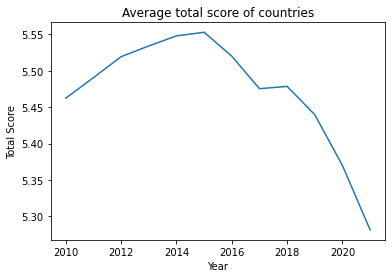

In [13]:
plt.plot(ec['Year'], ec['Overall score'])
plt.title("Average total score of countries")
plt.xlabel("Year")
plt.ylabel("Total Score")
plt.show()

Filter `joined_df` down to "United States of America" and call this sub-DataFrame `joined_us_df`. Make a figure with two subplots. Plot its "Political culture" scores from 2010 to 2021 as a bar graph on the left subplot. Plot its "Functioning of government" scores from 2010 to 2021 as a line graph on the right subplot. (3 pts)

In [14]:
joined_us_df = joined_df[joined_df['Country'] == "France"]
joined_us_df.set_index('Year', inplace = True)

In [15]:
joined_us_df

Country Rank  Overall score  Electoral process and pluralism  \
Year                                                                
2021  France   22           7.99                             9.58   
2020  France   24           7.99                             9.58   
2019  France   20           8.12                             9.58   
2018  France   29           7.80                             9.58   
2017  France   29           7.80                             9.58   
2016  France   24           7.92                             9.58   
2015  France   27           7.92                             9.58   
2014  France   23           8.04                             9.58   
2013  France   27           7.92                             9.58   
2012  France   28           7.88                             9.58   
2011  France   29           7.77                             9.58   
2010  France   31           7.77                             9.58   

      Functioning of government  Political participation  Political culture  \
Year                                                                          
2021                       7.50                     7.78               6.88   
2020                       7.50                     7.78               6.88   
2019                       7.86                     7.78               6.88   
2018                       7.50                     7.78               5.63   
2017                       7.50                     7.78               5.63   
2016                       7.14                     7.78               6.25   
2015                       7.14                     7.78               6.25   
2014                       7.14                     7.78               6.88   
2013                       6.79                     7.22               7.50   
2012                       7.14                     6.67               7.50   
2011                       7.14                     6.11               7.50   
2010                       7.14                     6.11               7.50   

      Civil liberties Country Name Iso3 code UN Regions   UN sub-region  \
Year                                                                      
2021             8.24       France       FRA     Europe  Western Europe   
2020             8.24       France       FRA     Europe  Western Europe   
2019             8.53       France       FRA     Europe  Western Europe   
2018             8.53       France       FRA     Europe  Western Europe   
2017             8.53       France       FRA     Europe  Western Europe   
2016             8.82       France       FRA     Europe  Western Europe   
2015             8.82       France       FRA     Europe  Western Europe   
2014             8.82       France       FRA     Europe  Western Europe   
2013             8.53       France       FRA     Europe  Western Europe   
2012             8.53       France       FRA     Europe  Western Europe   
2011             8.53       France       FRA     Europe  Western Europe   
2010             8.53       France       FRA     Europe  Western Europe   

              UNICEF region WHO Region World Bank Income Group  \
Year                                                             
2021  Europe & Central Asia       EURO             High Income   
2020  Europe & Central Asia       EURO             High Income   
2019  Europe & Central Asia       EURO             High Income   
2018  Europe & Central Asia       EURO             High Income   
2017  Europe & Central Asia       EURO             High Income   
2016  Europe & Central Asia       EURO             High Income   
2015  Europe & Central Asia       EURO             High Income   
2014  Europe & Central Asia       EURO             High Income   
2013  Europe & Central Asia       EURO             High Income   
2012  Europe & Central Asia       EURO             High Income   
2011  Europe & Central Asia       EURO             High Income   
2010  Europe & Central

## Make cat plots

Use `joined_df` to make a barplot with "UN Regions" on the y-axis, and "Overall score" on the x-axis. 

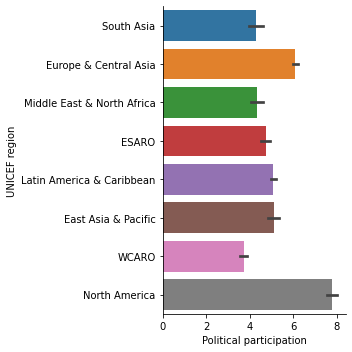

In [18]:
sb.catplot(
    data = joined_df,
    x = 'Political participation',
    y = 'UNICEF region',
    kind = 'bar',
)


Add "Developed/developing" as a hue to the previous chart below and try a *different* "kind" of catplot. 

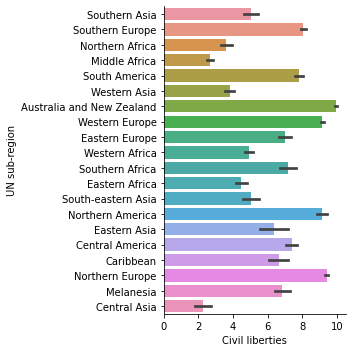

In [17]:
sb.catplot(
    data = joined_df,
    x = 'Civil liberties',
    y = 'UN sub-region',
    kind = 'bar',
)


Make a boxplot of the "Civil liberties" column on the y-axis, "Year" on the x-axis, and "World Bank Income Group" as a hue. 

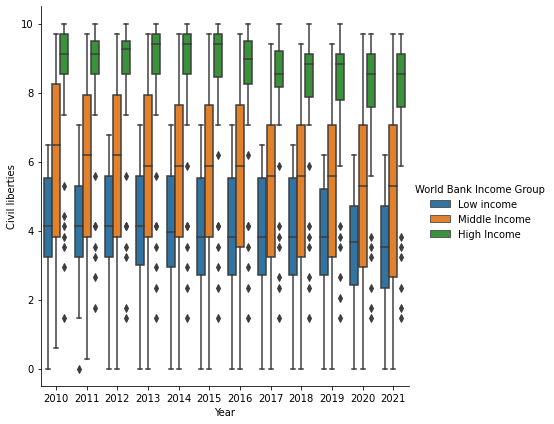

In [23]:
sb.catplot(
    data = joined_df,
    x = 'Year',
    y = 'Civil liberties',
    kind = 'box',
    hue = "World Bank Income Group",
    height = 6
)

Make another kind of catplot using the `joined_df`.

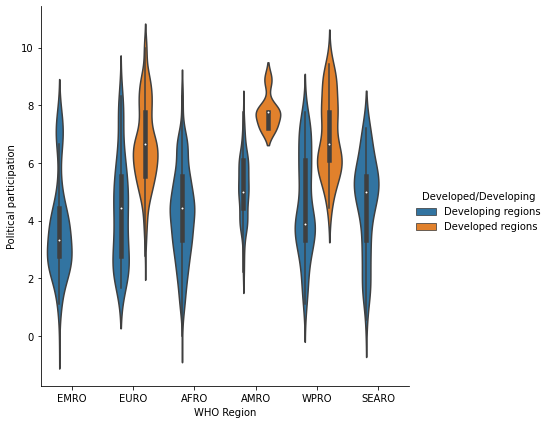

In [38]:
sb.catplot(
    data = joined_df,
    x = 'WHO Region',
    y = 'Political participation',
    kind = 'violin',
    hue = "Developed/Developing",
    height = 6
)

Write a few sentences about the patterns you saw in these cat plots. (2 pts)